# image encryption and decryption

In [18]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### Caesar cipher functions

In [ ]:
def caesar_encrypt_pixel(pixel, shift):
    return (pixel + shift) % 256

def caesar_decrypt_pixel(pixel, shift):
    return (pixel - shift) % 256

def shuffle_pixels(channel, seed=42):
    np.random.seed(seed)
    flat = channel.flatten()
    indices = np.arange(len(flat))
    np.random.shuffle(indices)
    shuffled = flat[indices]
    return shuffled.reshape(channel.shape), indices

def unshuffle_pixels(shuffled_channel, indices):
    flat = shuffled_channel.flatten()
    unshuffled = np.zeros_like(flat)
    unshuffled[indices] = flat
    return unshuffled.reshape(shuffled_channel.shape)

### Load image and split into channels

In [36]:
image_path = 'imgs/input_image.jpg'
image = Image.open(image_path).convert('RGB')
image_array = np.array(image, dtype=np.uint8)

r_channel, g_channel, b_channel = image_array[:, :, 0], image_array[:, :, 1], image_array[:, :, 2]

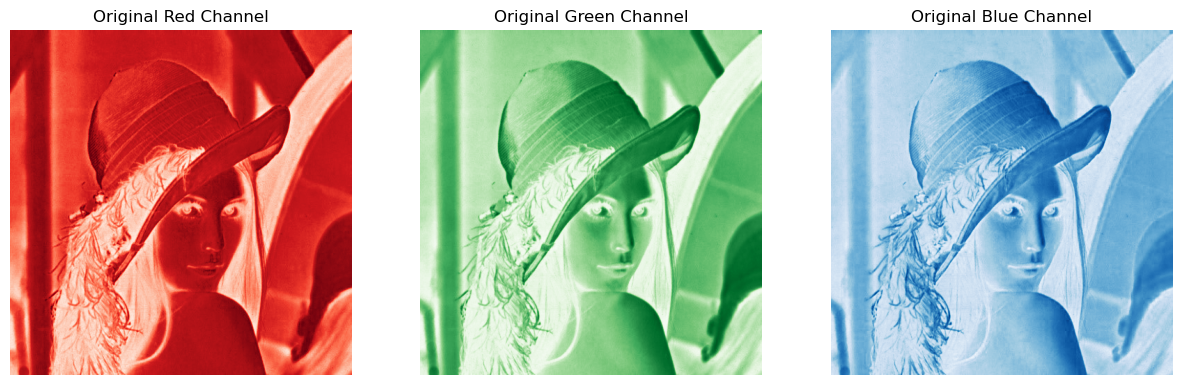

In [45]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(r_channel, cmap='Reds')
plt.title('Original Red Channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(g_channel, cmap='Greens')
plt.title('Original Green Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(b_channel, cmap='Blues')
plt.title('Original Blue Channel')
plt.axis('off')
plt.savefig('imgs/original_channels.png')
plt.show()

### Encryption: Confusion (Shuffle) then Diffusion (Caesar Cipher)

In [53]:
shift, seed = 50, 42  

shuffled_r, r_indices = shuffle_pixels(r_channel, seed)
encrypted_r = caesar_encrypt_pixel(shuffled_r, shift)

shuffled_g, g_indices = shuffle_pixels(g_channel, seed + 1)  # Different seed for each channel
encrypted_g = caesar_encrypt_pixel(shuffled_g, shift)

shuffled_b, b_indices = shuffle_pixels(b_channel, seed + 2)
encrypted_b = caesar_encrypt_pixel(shuffled_b, shift)

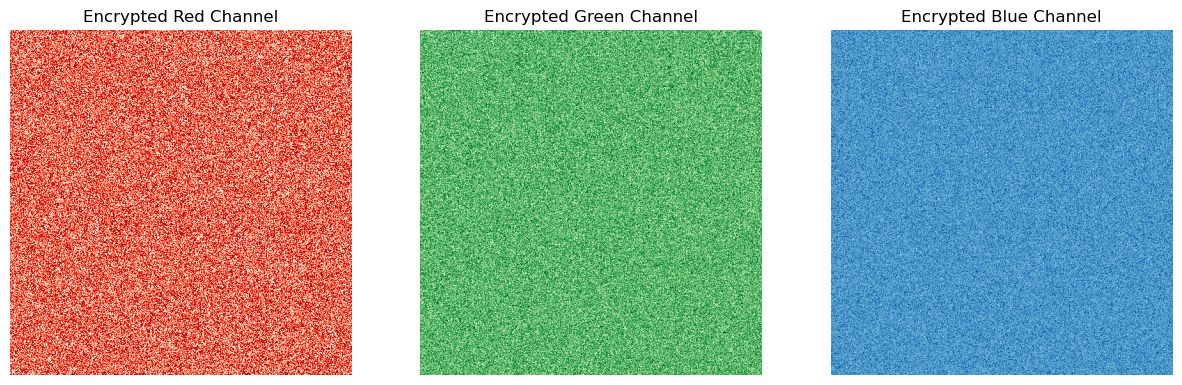

In [54]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(encrypted_r, cmap='Reds')
plt.title('Encrypted Red Channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(encrypted_g, cmap='Greens')
plt.title('Encrypted Green Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(encrypted_b, cmap='Blues')
plt.title('Encrypted Blue Channel')
plt.axis('off')
plt.savefig('imgs/encrypted_channels.png')
plt.show()

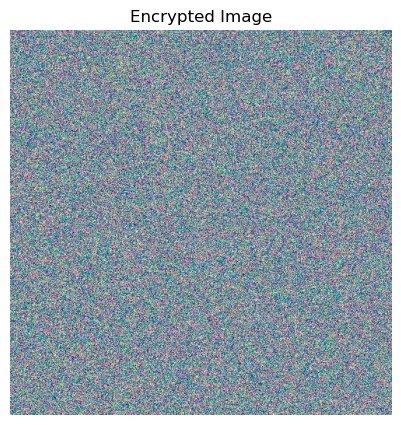

In [55]:
reconstructed_image = np.stack([encrypted_r, encrypted_g, encrypted_b], axis=2)

plt.figure(figsize=(5, 5))
plt.imshow(reconstructed_image)
plt.title('Encrypted Image')
plt.axis('off')
plt.savefig('imgs/encrypted_image.png')
plt.show()

### Decryption: Reverse Diffusion then Reverse Confusion

In [56]:
decrypted_r_diffusion = caesar_decrypt_pixel(encrypted_r, shift)
decrypted_r = unshuffle_pixels(decrypted_r_diffusion, r_indices)

decrypted_g_diffusion = caesar_decrypt_pixel(encrypted_g, shift)
decrypted_g = unshuffle_pixels(decrypted_g_diffusion, g_indices)

decrypted_b_diffusion = caesar_decrypt_pixel(encrypted_b, shift)
decrypted_b = unshuffle_pixels(decrypted_b_diffusion, b_indices)

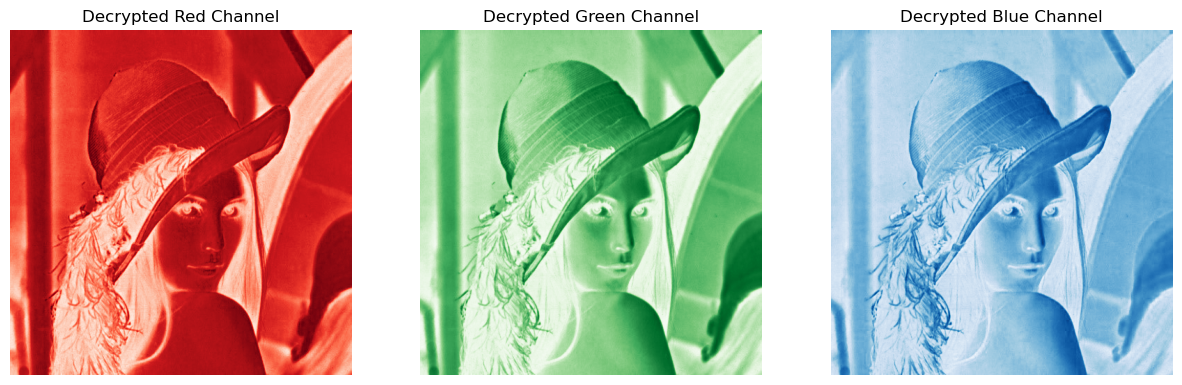

In [57]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(decrypted_r, cmap='Reds')
plt.title('Decrypted Red Channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(decrypted_g, cmap='Greens')
plt.title('Decrypted Green Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(decrypted_b, cmap='Blues')
plt.title('Decrypted Blue Channel')
plt.axis('off')
plt.savefig('imgs/decrypted_channels.png')
plt.show()

### Reconstruct and Display Final Image

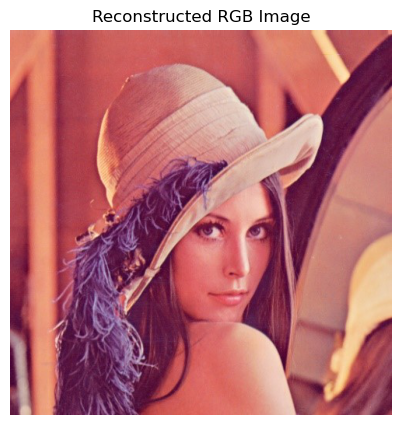

In [58]:
reconstructed_image = np.stack([decrypted_r, decrypted_g, decrypted_b], axis=2)

plt.figure(figsize=(5, 5))
plt.imshow(reconstructed_image)
plt.title('Reconstructed RGB Image')
plt.axis('off')
plt.savefig('imgs/reconstructed_image.png')
plt.show()